In [77]:
# Wczytywanie danych
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
db = pd.read_csv('World-happiness-report-2024.csv')

# Opis zbioru danych

In [78]:
print(db.shape)
print(db.head())

(143, 12)
  Country name            Regional indicator  Ladder score  upperwhisker  \
0      Finland                Western Europe         7.741         7.815   
1      Denmark                Western Europe         7.583         7.665   
2      Iceland                Western Europe         7.525         7.618   
3       Sweden                Western Europe         7.344         7.422   
4       Israel  Middle East and North Africa         7.341         7.405   

   lowerwhisker  Log GDP per capita  Social support  Healthy life expectancy  \
0         7.667               1.844           1.572                    0.695   
1         7.500               1.908           1.520                    0.699   
2         7.433               1.881           1.617                    0.718   
3         7.267               1.878           1.501                    0.724   
4         7.277               1.803           1.513                    0.740   

   Freedom to make life choices  Generosity  Percept

- Ramka "World-happiness-report-2024" zawiera 12 kolumn po 143 wiersze.

- 2 kolumny to dane jakościowe-nominalne (nazwa państwa, indykator regionu) - oba zapisywane jako Stringi

- Reszta to dane ilościowe-ilorazowe zapisywane jako floaty (choć zdarza się trochę NaN-ów i 0 w znaczeniu braku danych)

# Główne statystyki

In [79]:
db.describe()
# Z jakiegoś powodu tabelka zawiera dane o oczekiwanej długości życia podzielone przez 100.

,Ladder score,upperwhisker,lowerwhisker,Log GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Dystopia + residual
count,143.000000,143.000000,143.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000
mean,5.527580,5.641175,5.413972,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,1.575914
std,1.170717,1.155008,1.187133,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,0.537459
min,1.721000,1.775000,1.667000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.073000
25%,4.726000,4.845500,4.606000,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,1.308250
50%,5.785000,5.895000,5.674000,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,1.644500
75%,6.416000,6.507500,6.319000,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,1.881750
max,7.741000,7.815000,7.667000,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,2.998000


# Przykładowe statystyki z podziałem na regiony

In [80]:
dbreg = db.groupby('Regional indicator')
dbregstats = dbreg[["Ladder score", "Log GDP per capita", "Healthy life expectancy", "Perceptions of corruption"]]
dbregstats.mean()

,Ladder score,Log GDP per capita,Healthy life expectancy,Perceptions of corruption
Regional indicator,,,,
Central and Eastern Europe,6.170941,1.637765,0.610412,0.089353
Commonwealth of Independent States,5.538500,1.401000,0.543556,0.122333
East Asia,5.934333,1.700333,0.681833,0.200000
Latin America and Caribbean,6.143368,1.328211,0.571158,0.109211
Middle East and North Africa,5.199941,1.460533,0.553200,0.146067
North America and ANZ,6.927750,1.860750,0.652000,0.335000
South Asia,3.895667,1.051833,0.420333,0.099500
Southeast Asia,5.551889,1.374333,0.520222,0.164556
Sub-Saharan Africa,4.329686,0.904171,0.297686,0.111429


In [81]:
dbregstats.std()
# Wynika stąd np. że w Europie Zachodniej bardzo zróżnicowana jest percepcja korupcji między państwami
# Albo, że bardzo róznie w rankingu zajmują miejsca państwa z Bliskiego Wschodu i Północnej Afryki

,Ladder score,Log GDP per capita,Healthy life expectancy,Perceptions of corruption
Regional indicator,,,,
Central and Eastern Europe,0.494803,0.135296,0.036973,0.094332
Commonwealth of Independent States,0.480649,0.184776,0.034319,0.074030
East Asia,0.398773,0.221848,0.162687,0.114240
Latin America and Caribbean,0.376936,0.365315,0.065619,0.071370
Middle East and North Africa,1.260354,0.335232,0.098459,0.077664
North America and ANZ,0.151476,0.055301,0.074256,0.128859
South Asia,1.177069,0.245361,0.125082,0.046427
Southeast Asia,0.779519,0.349632,0.113938,0.162781
Sub-Saharan Africa,0.704075,0.273250,0.086919,0.058567


In [82]:
dbregstats.agg(["min", "max"])

Ladder score        Log GDP per capita  \
                                            min    max                min   
Regional indicator                                                          
Central and Eastern Europe                5.304  6.822              1.364   
Commonwealth of Independent States        4.873  6.195              1.054   
East Asia                                 5.316  6.503              1.353   
Latin America and Caribbean               5.607  6.955              0.000   
Middle East and North Africa              2.707  7.341              0.671   
North America and ANZ                     6.725  7.057              1.810   
South Asia                                1.721  5.158              0.628   
Southeast Asia                            4.341  6.523              0.978   
Sub-Saharan Africa                        3.186  5.816              0.534   
Western Europe                            5.934  7.741              1.684   

                                          Healthy life expectancy         \
                                      max                     min    max   
Regional indicator                                                         
Central and Eastern Europe          1.786                   0.564  0.695   
Commonwealth of Independent States  1.642                   0.496  0.603   
East Asia                           1.909                   0.400  0.857   
Latin America and Caribbean         1.702                   0.467  0.673   
Middle East and North Africa        1.983                   0.293  0.740   
North America and ANZ               1.939                   0.542  0.701   
South Asia                          1.361                   0.242  0.586   
Southeast Asia                      2.118                   0.423  0.769   
Sub-Saharan Africa                  1.570                   0.000  0.490   
Western Europe                      2.141                   0.672  0.747   

                                   Perceptions of corruption         
                                                         min    max  
Regional indicator                                                   
Central and Eastern Europe                             0.000  0.401  
Commonwealth of Independent States                     0.025  0.215  
East Asia                                              0.055  0.402  
Latin America and Caribbean                            0.028  0.253  
Middle East and North Africa                           0.018  0.259  
North America and ANZ                                  0.169  0.480  
South Asia                                             0.031  0.167  
Southeast Asia                                         0.024  0.575  
Sub-Saharan Africa                                     0.019  0.257  
Western Europe                                         0.035  0.548

# Przykładowe Wykresy

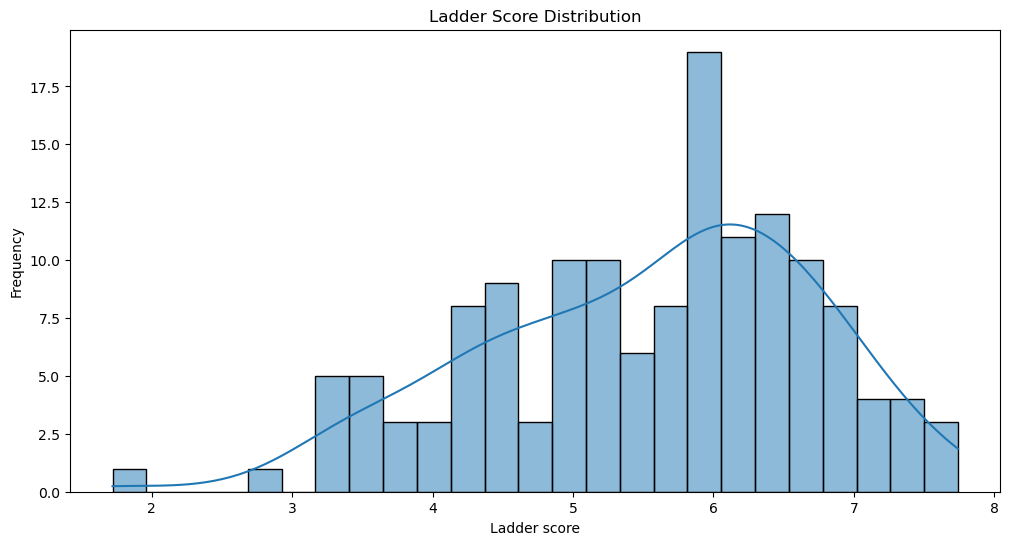

In [83]:
plt.figure(figsize=(12, 6))
sns.histplot(db['Ladder score'], bins=25, kde=True)
plt.title('Ladder Score Distribution')
plt.xlabel('Ladder score')
plt.ylabel('Frequency')
plt.show()

Wykres ten jest wyraźnie asymetryczny lewostronnie, z modą około 6.

Pokazuje to, że indeks szczęścia nie jest obecnie zaprojektowany aby być dokładnie rozkładem normalnym. (Może był w przeszłości tak zaprojektowany, ale z biegiem lat garb się przesunął w prawo, aby odwzierciedlić progres)

O wiele łatwiej porównywać państwa *nieszczęśliwe* i dawać im różne wyniki.

Natomiast od pewnego momentu, różnice zaczynają się zacierać.

Ze skali 1-10. Najgorsze państwa uzyskują wynik w okolicach 1.7. A najlepsze nawet nie przekraczają 8. 

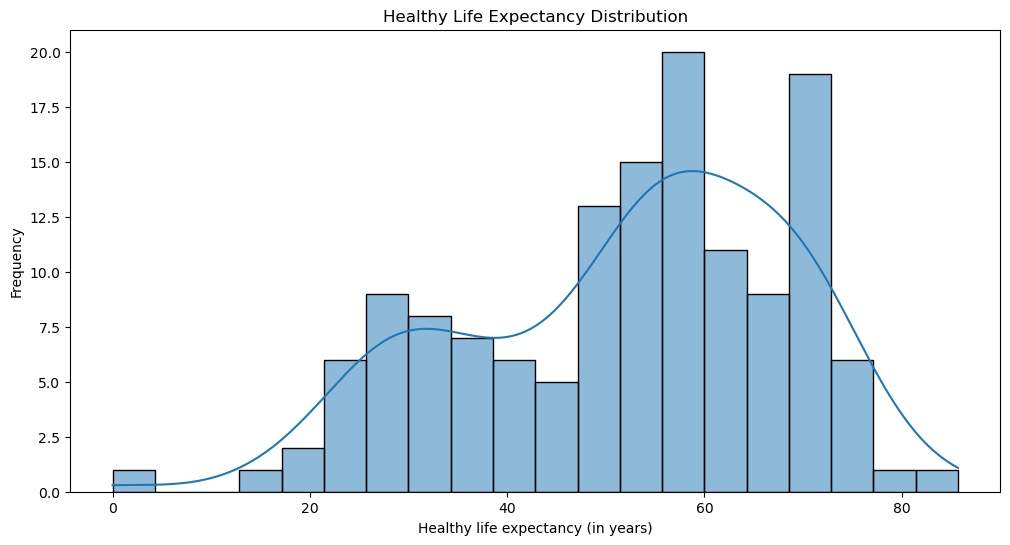

In [84]:
plt.figure(figsize=(12, 6))
sns.histplot(db['Healthy life expectancy']*100, bins=20, kde=True)
plt.title('Healthy Life Expectancy Distribution')
plt.xlabel('Healthy life expectancy (in years)')
plt.ylabel('Frequency')
plt.show()

Rozkład oczekiwanej długości życia przy porodzie jest rozkładem bimodalnym.

Można założyć, że istnieje jakiś moment skokowy: technologiczny, społeczny. Który powoduje nagłe przejście państw z lewego garba do prawego. Ale, żeby to potwierdzić dobrze byłoby mieć te wykresy na przestrzeni lat.

Natomiast pomijając ten nagły moment skokowy, to reszta zmian ma mniejszy wpływ.

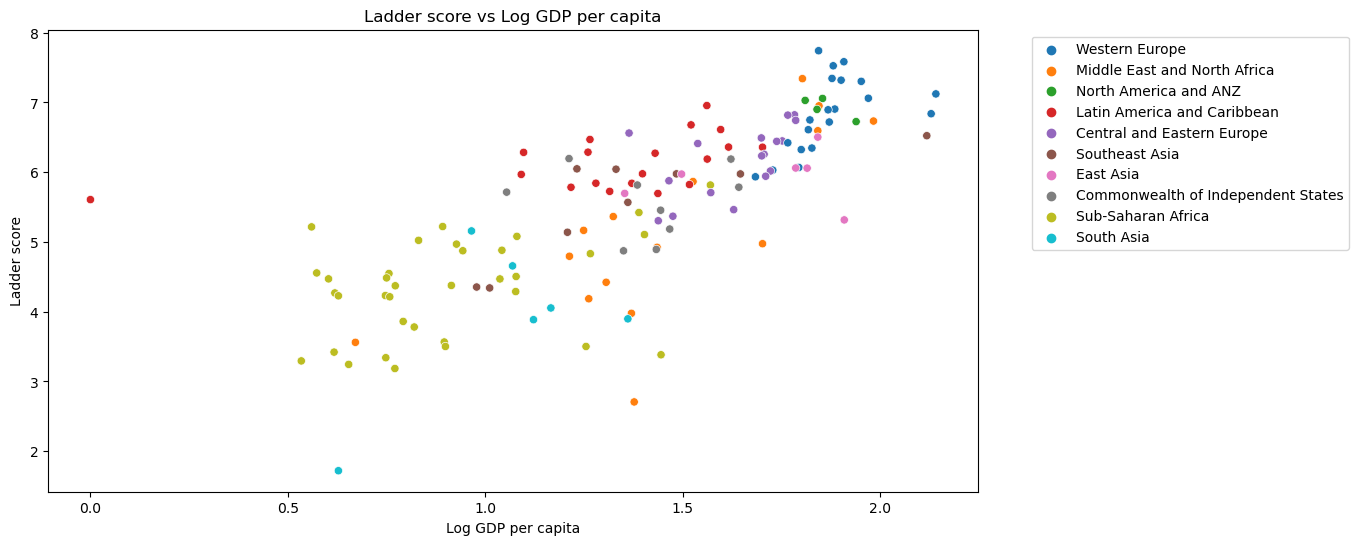

In [85]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=db, x='Log GDP per capita', y='Ladder score', hue='Regional indicator')
plt.title('Ladder score vs Log GDP per capita')
plt.xlabel('Log GDP per capita')
plt.ylabel('Ladder score')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Widzimy, że indeks szczęścia jest powiązany logarytmicznie z PKB per capita. Widzimy również wyraźne zależności regionowe.
Np. Państwa Afryki Sub-Saharyjskiej są wyraźnie biedniejsze i mniej szczęśliwsze od państw Europy Zachodniej które są najbogatsze i najszczęśliwsze. 

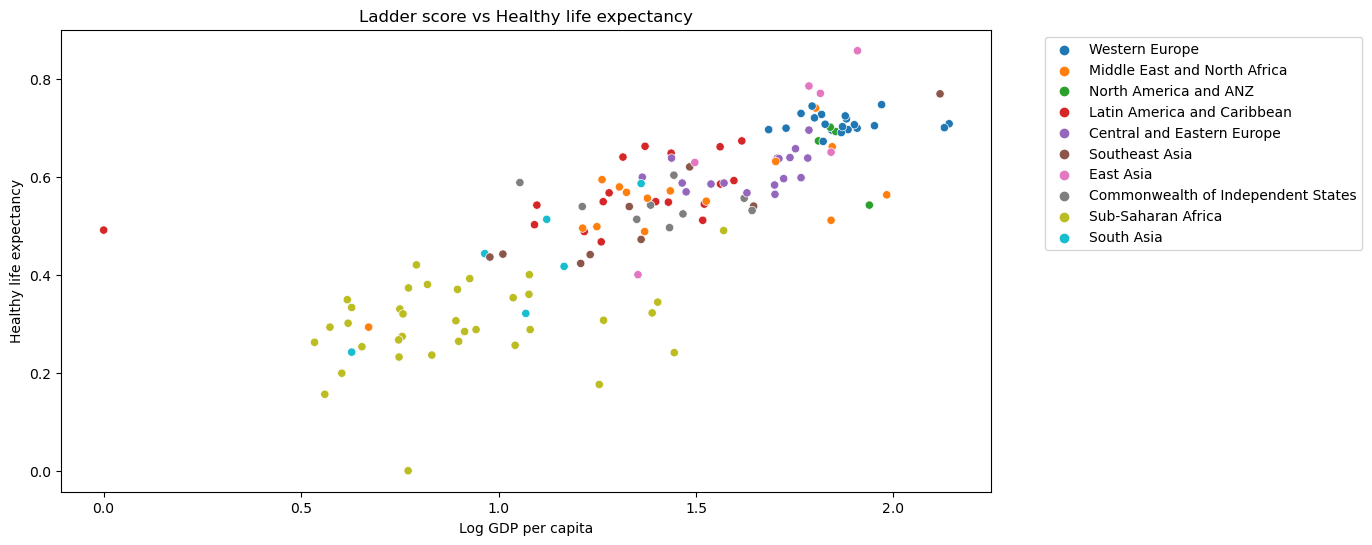

In [86]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=db, x='Log GDP per capita', y='Healthy life expectancy', hue='Regional indicator')
plt.title('Ladder score vs Healthy life expectancy')
plt.xlabel('Log GDP per capita')
plt.ylabel('Healthy life expectancy')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Analogiczne wnioski zachodzą dla PKB per capita i Oczekiwanej długości życia. Ale ta zależność jest jeszcze mocniejesza.

Zmienia się głównie rozłożenie państw azjatyckich. Mimo niskiego szczęścia (wg poprzedniego wykresu) mają wysoką oczekiwaną długość życia.